# Problem Statement

A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

### Goal & Objective: 

The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.
Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.
This is the first phase of the agreement; hence, company has shared very limited information. Once you are able to showcase a tangible impact with this much of information then company will open the 360 degree data lake for your consulting company to build a more robust model.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.options.display.max_columns = None


In [2]:
df1 = pd.read_csv("Data.csv")
df = df1.set_index('Ware_house_ID')
df.head()

,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
Ware_house_ID,,,,,,,,,,,,,,,,,,,,,,,
WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
df.tail()

,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
Ware_house_ID,,,,,,,,,,,,,,,,,,,,,,,
WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,Rented,19,0,0,1,142,34.0,2005.0,22,1,A,2,30,32093
WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,Company Owned,57,0,0,1,130,28.0,2012.0,10,0,B,4,18,12114
WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,Rented,31,1,0,1,147,NaN,NaN,23,0,B+,5,25,27080
WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,Rented,25,0,0,1,60,25.0,NaN,18,0,A,6,30,25093
WH_124999,EID_74999,Rural,Mid,West,Zone 4,8,2,4,5664,Company Owned,21,0,1,1,239,39.0,2019.0,4,0,B+,2,11,5058


In [4]:
df.shape

(25000, 23)

In [5]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [6]:
df.describe(include='all')

,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000,25000,25000,25000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,24092,25000.000000,25000.000000,25000.000000
unique,25000,2,3,4,6,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,EID_52405,Rural,Large,North,Zone 6,NaN,NaN,NaN,NaN,Company Owned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,1,22957,10169,10278,8339,NaN,NaN,NaN,NaN,13578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5501,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.089040,0.773680,3.104200,4985.711560,NaN,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,NaN,3.482040,18.812280,22102.632920
std,NaN,NaN,NaN,NaN,NaN,2.606612,1.199449,1.141663,1052.825252,NaN,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,NaN,1.690335,8.632382,11607.755077
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1821.000000,NaN,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,NaN,0.000000,1.000000,2065.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,4313.000000,NaN,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,NaN,2.000000,11.000000,13059.000000
50%,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,4859.000000,NaN,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,NaN,3.000000,21.000000,22101.000000
75%,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,5500.000000,NaN,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,NaN,5.000000,26.000000,30103.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, WH_100000 to WH_124999
Data columns (total 23 columns):
WH_Manager_ID                   25000 non-null object
Location_type                   25000 non-null object
WH_capacity_size                25000 non-null object
zone                            25000 non-null object
WH_regional_zone                25000 non-null object
num_refill_req_l3m              25000 non-null int64
transport_issue_l1y             25000 non-null int64
Competitor_in_mkt               25000 non-null int64
retail_shop_num                 25000 non-null int64
wh_owner_type                   25000 non-null object
distributor_num                 25000 non-null int64
flood_impacted                  25000 non-null int64
flood_proof                     25000 non-null int64
electric_supply                 25000 non-null int64
dist_from_hub                   25000 non-null int64
workers_num                     24010 non-null float64
wh_est_year                 

In [8]:
df.isnull().sum()

WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [9]:
(df.isnull().sum()/len(df))*100

WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [10]:
product_wg_ton_across_zone = pd.pivot_table(df, values=['product_wg_ton'], index=['wh_est_year', 'zone'])
product_wg_ton_across_zone

product_wg_ton
wh_est_year zone                 
1996.0      East     34614.500000
            North    35020.408451
            South    34025.018182
            West     35422.793651
1997.0      East     38114.000000
            North    33936.573643
            South    35382.709677
            West     35517.509434
1998.0      East     35213.000000
            North    34781.502415
            South    34106.789474
            West     35985.016854
1999.0      East     36108.125000
            North    35009.727273
            South    35651.128440
            West     34140.339744
2000.0      East     33971.000000
            North    34906.995370
            South    35655.122449
            West     35329.072222
2001.0      East     31740.250000
            North    35491.553191
            South    34360.077586
            West     34776.415094
2002.0      East     34183.230769
            North    33973.155251
            South    36317.668966
            West     34866.089744
2003.0      East     34177.133333
            North    34648.120879
...                           ...
2016.0      South    15580.769841
            West     15270.357143
2017.0      East     14795.600000
            North    12491.573684
            South    15243.507937
            West     12911.845679
2018.0      East      9288.800000
            North    10714.478469
            South    10941.745902
            West     10786.660494
2019.0      East      8495.300000
            North     9519.471963
            South     9351.658915
            West      8961.844156
2020.0      East      7854.333333
            North     8125.322751
            South     7686.708029
            West      7639.525316
2021.0      East      6762.333333
            North     7062.221622
            South     6975.395522
            West      7092.319018
2022.0      East      5913.200000
            North     6741.923611
            South     7181.298701
            West      6950.839623
2023.0      East      7610.500000
            North     7774.068966
            South     7004.612245
            West      6551.484848

[112 rows x 1 columns]

In [11]:
pd.pivot_table(df, values=['product_wg_ton'], index=['Location_type','WH_capacity_size', 'zone'])

product_wg_ton
Location_type WH_capacity_size zone                 
Rural         Large            East     23981.428571
                               North    21862.335525
                               South    21729.573549
                               West     21680.658333
              Mid              East     22744.659483
                               North    21859.001834
                               South    21733.035005
                               West     22155.852560
              Small            East     20632.795699
                               North    22013.538694
                               South    21757.077731
                               West     21385.648944
Urban         Large            East     22343.500000
                               North    26143.980892
                               South    24290.804511
                               West     24601.686957
              Mid              East     25277.000000
                               North    25354.335766
                               South    24749.337500
                               West     24806.487179
              Small            East     28465.500000
                               North    23744.112782
                               South    23418.527778
                               West     24939.333333

In [12]:
df.groupby(['Location_type','WH_capacity_size','zone']).size()

Location_type  WH_capacity_size  zone 
Rural          Large             East       70
                                 North    5019
                                 South    1482
                                 West     2760
               Mid               East      232
                                 North    2727
                                 South    2971
                                 West     3242
               Small             East       93
                                 North    1654
                                 South    1428
                                 West     1279
Urban          Large             East        4
                                 North     471
                                 South     133
                                 West      230
               Mid               East       22
                                 North     274
                                 South     240
                                 West      312
               Small 

In [13]:
df.groupby(['flood_impacted','flood_proof','electric_supply']).size()

flood_impacted  flood_proof  electric_supply
0               0            0                   8204
                             1                  13291
                1            0                    114
                             1                    937
1               0            0                    215
                             1                   1924
                1            0                     45
                             1                    270
dtype: int64

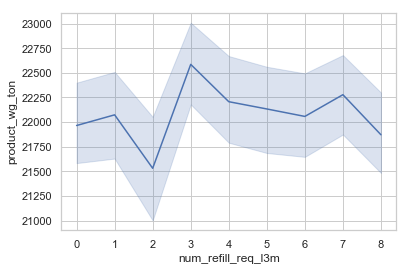

In [14]:
sns.lineplot(df['num_refill_req_l3m'],df['product_wg_ton'])

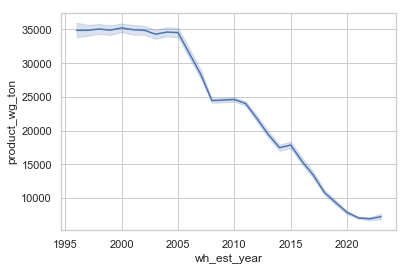

In [15]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = df['wh_est_year']
# xline = df['product_wg_ton']
# yline = df['retail_shop_num']
# ax.plot3D(xline, yline, zline, 'gray')
sns.lineplot(df['wh_est_year'],df['product_wg_ton'])

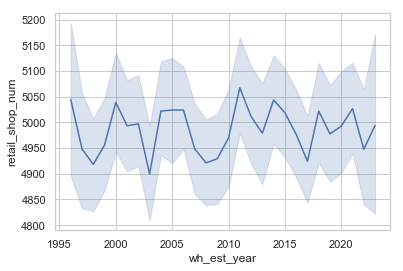

In [16]:
sns.lineplot(df['wh_est_year'],df['retail_shop_num'])

# 3) Exploratory data analysis

### Univariate analysis

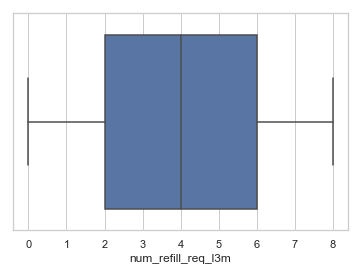

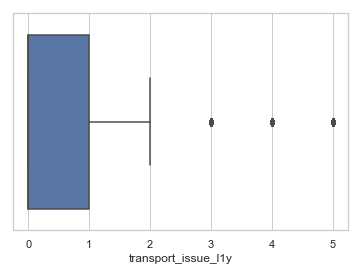

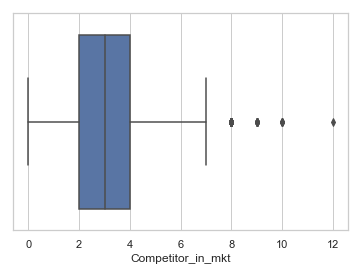

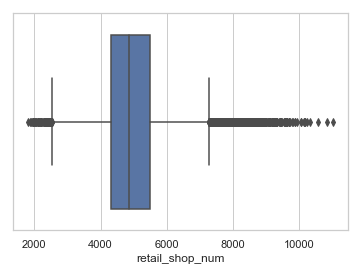

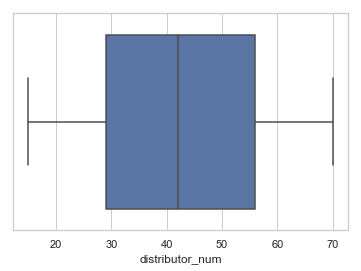

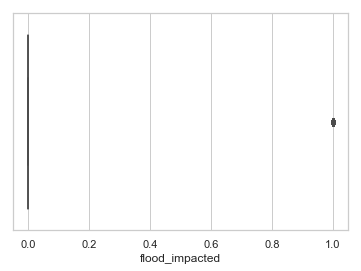

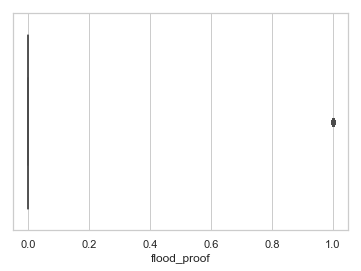

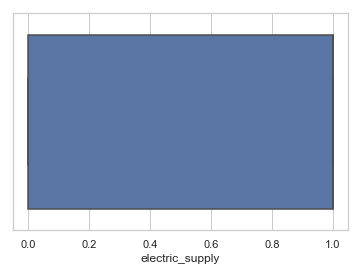

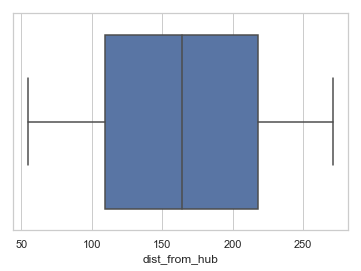

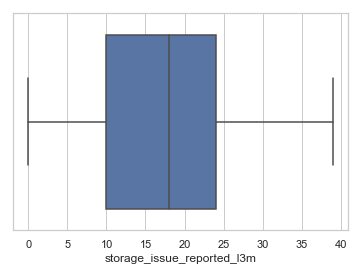

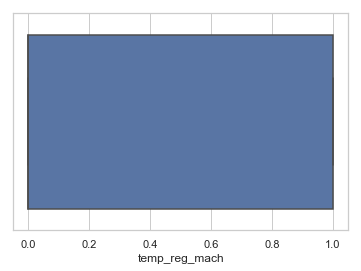

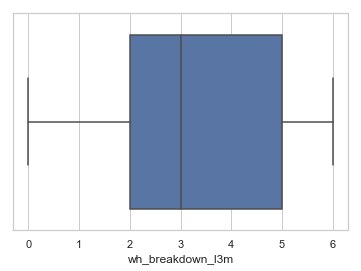

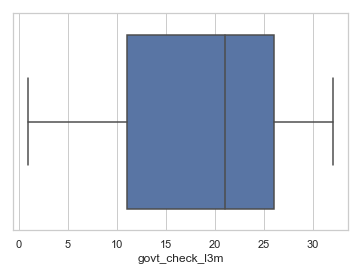

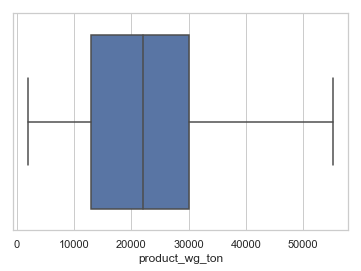

In [17]:
splot_cols=df.columns
for i in splot_cols:
    if df[i].dtype != 'object' and df[i].isnull().values.any() != True:
        sns.boxplot(df[i])
        plt.show()

### Bivariate analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


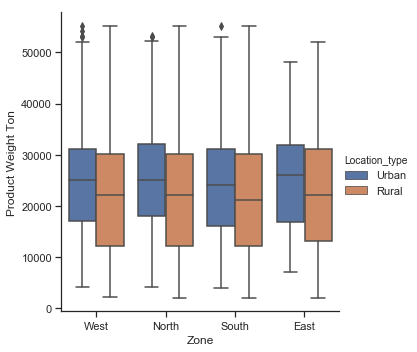

In [18]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("zone", "product_wg_ton", "Location_type", data=df, kind="box")
    g.set_axis_labels("Zone", "Product Weight Ton");

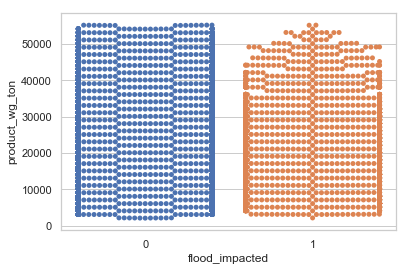

In [20]:
sns.swarmplot(x='flood_impacted', y='product_wg_ton', data=df)

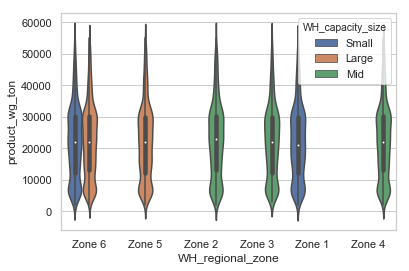

In [21]:
sns.violinplot(x='WH_regional_zone', y='product_wg_ton',hue='WH_capacity_size', data=df)

In [22]:
df.columns

Index(['WH_Manager_ID', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


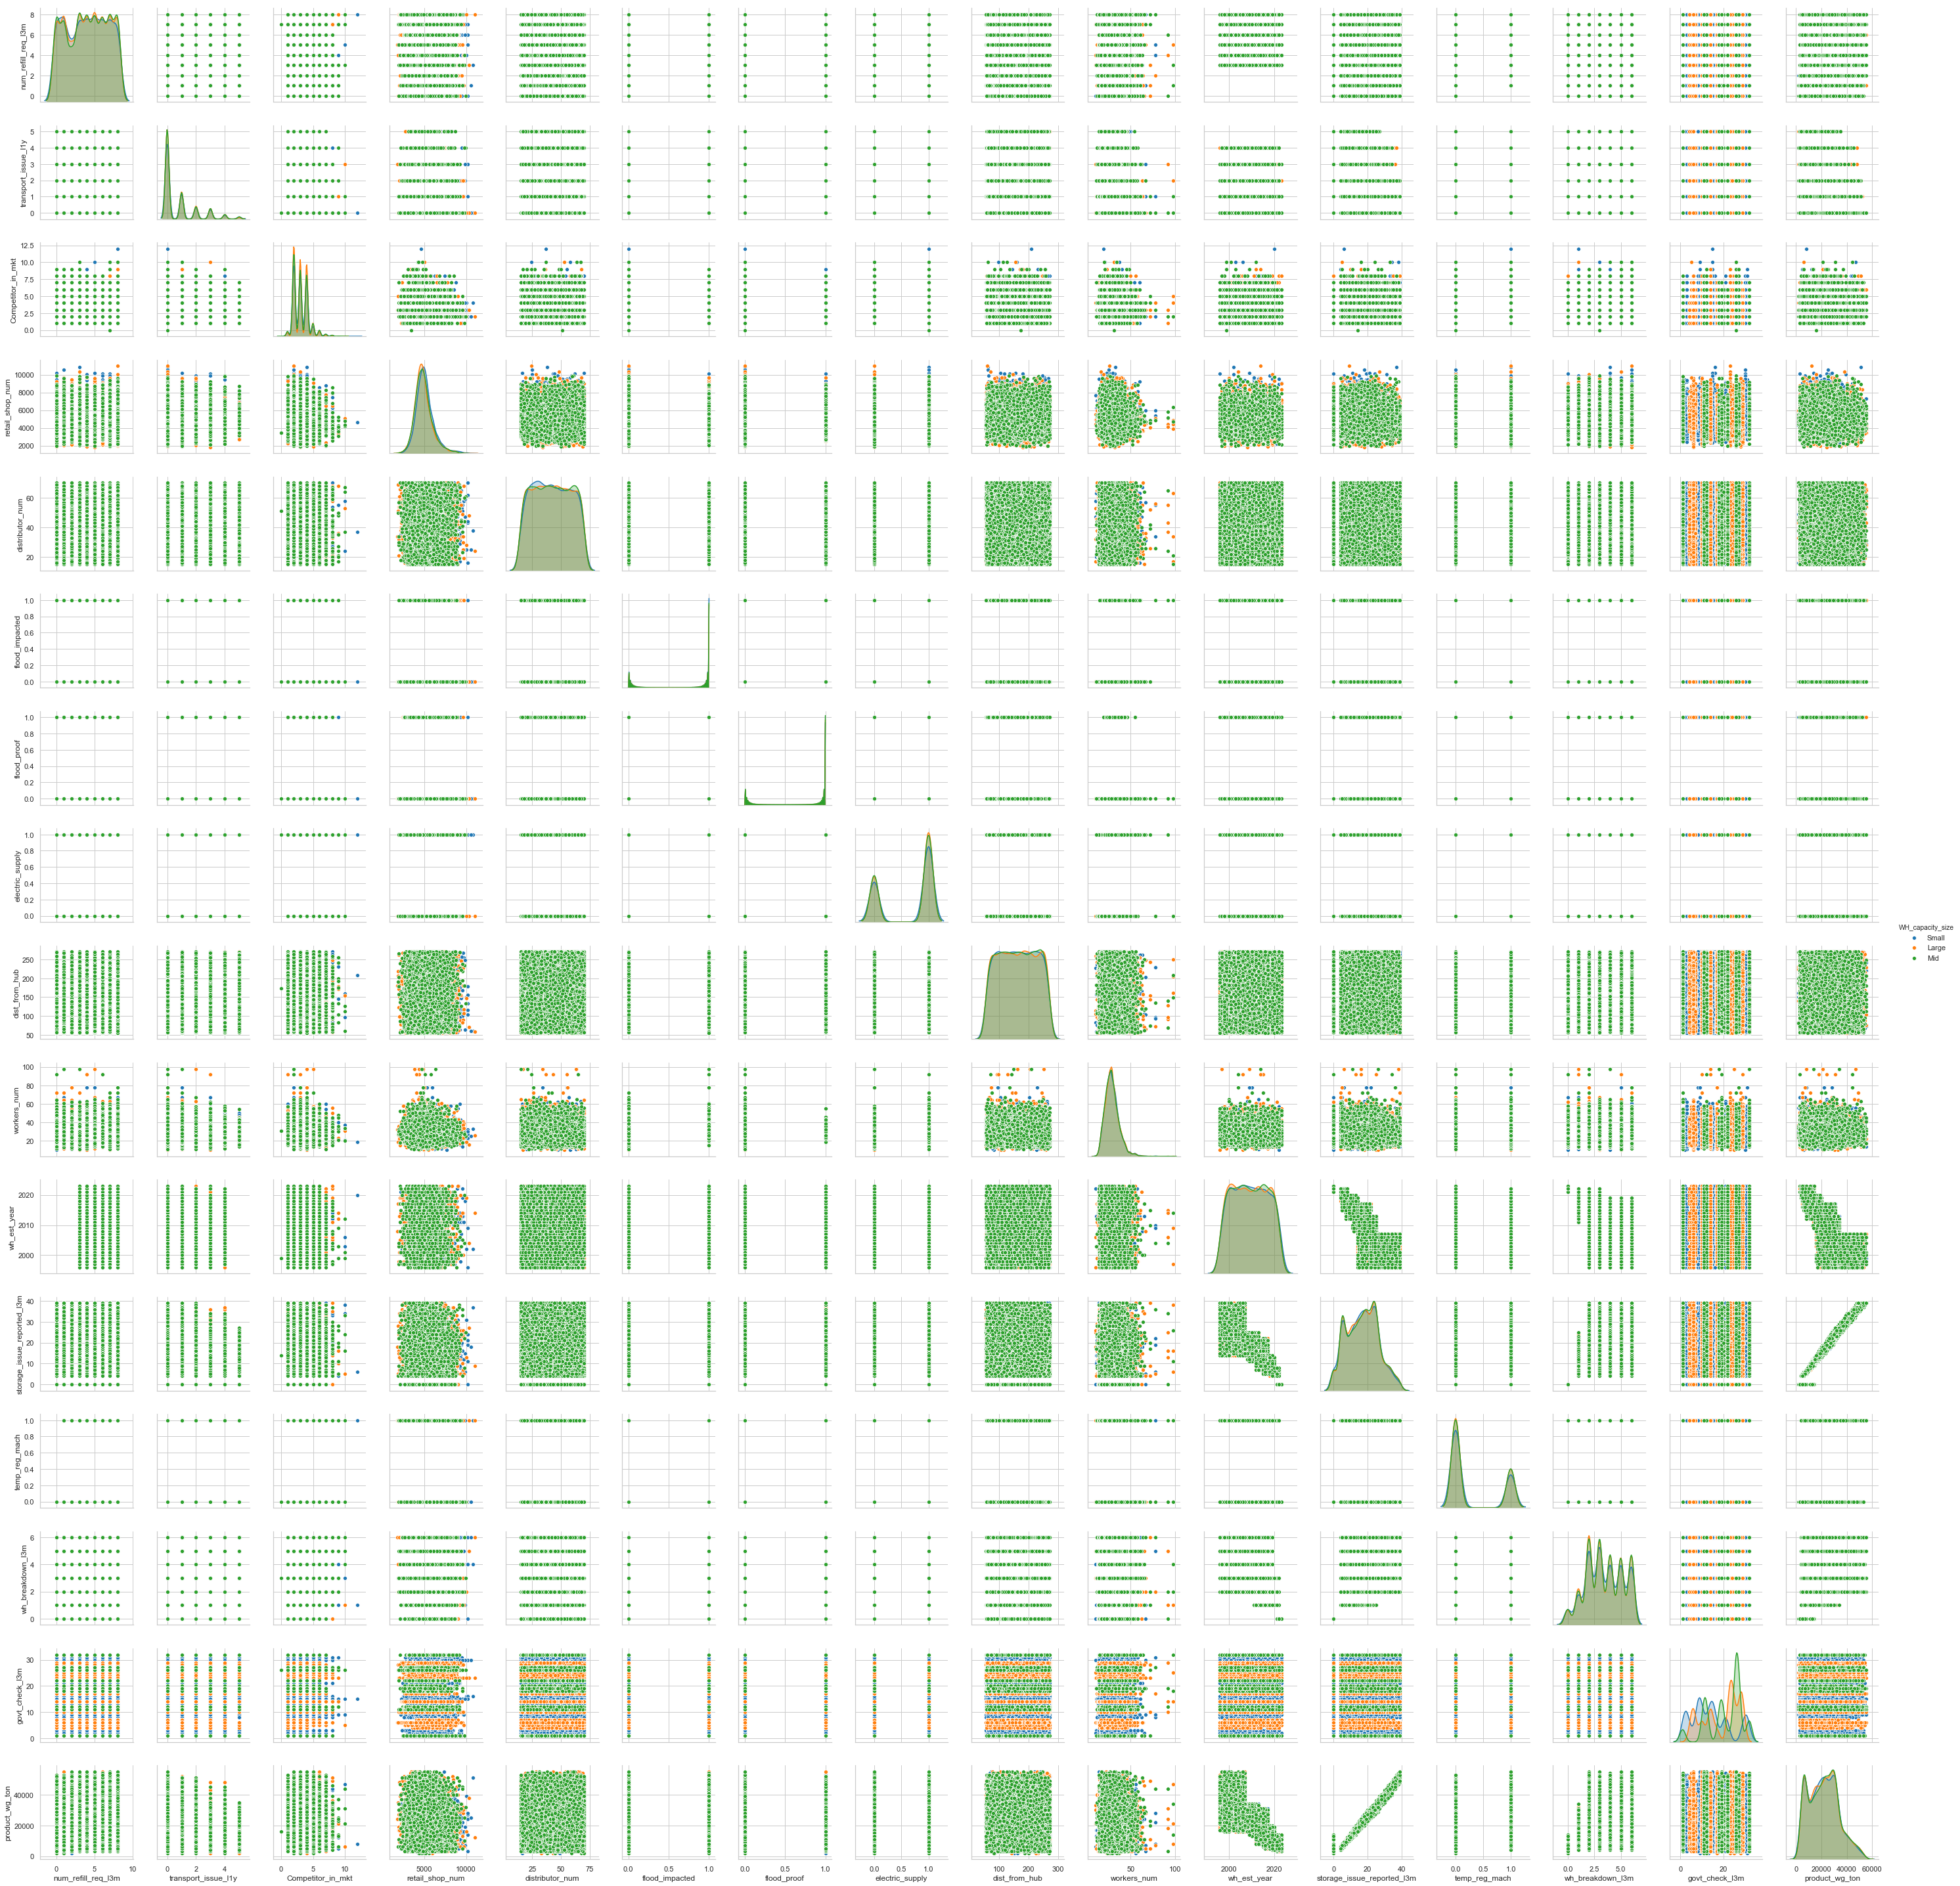

In [23]:
sns.pairplot(df,hue='WH_capacity_size',diag_kind='kde',palette="tab10")

In [24]:
df.corr()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.018549,0.002985,-0.001186,0.003995,-0.010548,-0.001123,-0.007959,0.000048,-0.013764,0.015363,-0.006602,0.260928,0.000608,-0.003302,0.001415
transport_issue_l1y,0.018549,1.000000,-0.005826,-0.001826,0.008993,-0.009596,0.000022,-0.009299,0.014336,-0.009004,-0.012910,-0.144327,0.018207,0.012990,0.002190,-0.173992
Competitor_in_mkt,0.002985,-0.005826,1.000000,-0.156943,-0.001492,0.009338,-0.003444,0.001759,0.008407,0.000050,-0.011202,0.009543,0.009524,0.012733,-0.043455,0.008884
retail_shop_num,-0.001186,-0.001826,-0.156943,1.000000,-0.000395,-0.003774,0.007223,-0.009207,0.000429,-0.005406,0.005721,-0.006632,-0.001273,-0.008420,0.045749,-0.006615
distributor_num,0.003995,0.008993,-0.001492,-0.000395,1.000000,0.004611,-0.003409,0.000454,-0.011838,-0.014682,-0.012295,0.003396,0.002827,0.004286,-0.007934,0.004999
flood_impacted,-0.010548,-0.009596,0.009338,-0.003774,0.004611,1.000000,0.107015,0.164815,0.000749,0.168425,-0.000668,-0.003157,-0.008554,-0.001744,0.000587,-0.002299
flood_proof,-0.001123,0.000022,-0.003444,0.007223,-0.003409,0.107015,1.000000,0.114811,-0.005315,0.041228,-0.003329,-0.002712,0.005636,-0.005151,-0.003600,-0.000441
electric_supply,-0.007959,-0.009299,0.001759,-0.009207,0.000454,0.164815,0.114811,1.000000,-0.002701,0.339990,-0.006577,-0.001877,-0.007600,-0.010371,-0.005234,-0.002160
dist_from_hub,0.000048,0.014336,0.008407,0.000429,-0.011838,0.000749,-0.005315,-0.002701,1.000000,-0.018565,0.009226,-0.005726,0.000902,-0.000906,-0.000531,-0.005017
workers_num,-0.013764,-0.009004,0.000050,-0.005406,-0.014682,0.168425,0.041228,0.339990,-0.018565,1.000000,0.004383,-0.008673,0.001419,-0.017877,-0.003137,-0.008346


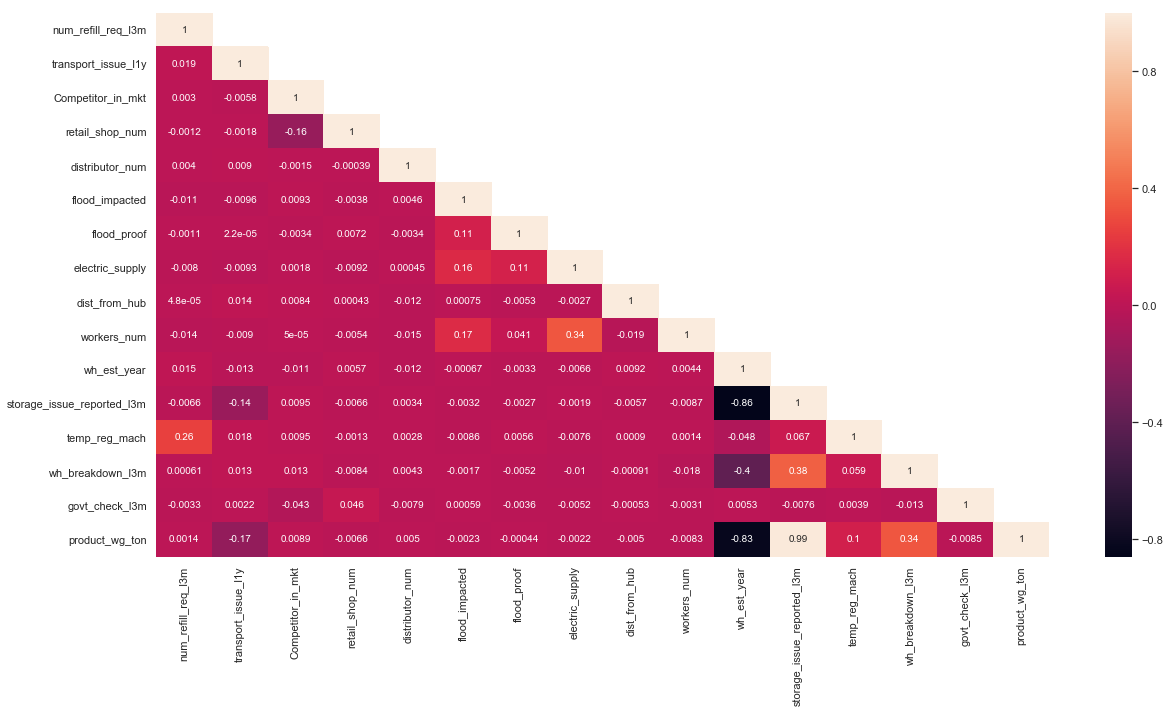

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1))

### Removal of unwanted variables (if applicable)


###### As 'WH_Manager_ID' and Ware_house_ID are unique values, we are dropping WH_Manager_ID and keeping Ware_house_ID as an index value.

###### As 'wh_est_year' having 48% of null values, so we are dropping wh_est_year variable.

###### 'storage_issue_reported_l3m' independent variable is highly correlated with the target column. So 'storage_issue_reported_l3m' can be dropped.


In [26]:
df.drop(['WH_Manager_ID','storage_issue_reported_l3m', 'wh_est_year'], axis = 1, inplace = True)

### Missing Value treatment (if applicable)

In [27]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum() 

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [28]:
mode = df['approved_wh_govt_certificate'].mode()[0]
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna(mode)
df.isnull().sum() 

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [29]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

LOCATION_TYPE :  2
Urban     2043
Rural    22957
Name: Location_type, dtype: int64


WH_CAPACITY_SIZE :  3
Small     4811
Mid      10020
Large    10169
Name: WH_capacity_size, dtype: int64


ZONE :  4
East       429
South     6362
West      7931
North    10278
Name: zone, dtype: int64


WH_REGIONAL_ZONE :  6
Zone 1    2054
Zone 3    2881
Zone 2    2963
Zone 4    4176
Zone 5    4587
Zone 6    8339
Name: WH_regional_zone, dtype: int64


WH_OWNER_TYPE :  2
Rented           11422
Company Owned    13578
Name: wh_owner_type, dtype: int64


APPROVED_WH_GOVT_CERTIFICATE :  5
A+    4191
A     4671
B     4812
B+    4917
C     6409
Name: approved_wh_govt_certificate, dtype: int64




### Outlier treatment (if required)

From the boxplot we can infer that, outlier treatment is not required for this dataset.

### Variable transformation (if applicable)

In [30]:
df_cat_train = df.select_dtypes(include = ['object'])
df_num_train = df.select_dtypes(include = ['float64','int64'])

In [31]:
df_cat_train = pd.get_dummies(df_cat_train, drop_first = True)
df_cat_train.shape

(25000, 16)

In [32]:
df_new = pd.concat([df_cat_train,df_num_train],axis=1)
df_new.shape

(25000, 30)

In [33]:
df_new.head()

,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
Ware_house_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WH_100000,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,3,1,2,4651,24,0,1,1,91,29.0,0,5,15,17115
WH_100001,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,6217,47,0,0,1,210,31.0,0,3,17,5074
WH_100002,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,4,4306,64,0,0,0,161,37.0,0,6,22,23137
WH_100003,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,7,4,2,6000,50,0,0,0,103,21.0,1,3,27,22115
WH_100004,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,3,1,2,4740,42,1,0,1,112,25.0,0,6,24,24071


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, WH_100000 to WH_124999
Data columns (total 30 columns):
Location_type_Urban                25000 non-null uint8
WH_capacity_size_Mid               25000 non-null uint8
WH_capacity_size_Small             25000 non-null uint8
zone_North                         25000 non-null uint8
zone_South                         25000 non-null uint8
zone_West                          25000 non-null uint8
WH_regional_zone_Zone 2            25000 non-null uint8
WH_regional_zone_Zone 3            25000 non-null uint8
WH_regional_zone_Zone 4            25000 non-null uint8
WH_regional_zone_Zone 5            25000 non-null uint8
WH_regional_zone_Zone 6            25000 non-null uint8
wh_owner_type_Rented               25000 non-null uint8
approved_wh_govt_certificate_A+    25000 non-null uint8
approved_wh_govt_certificate_B     25000 non-null uint8
approved_wh_govt_certificate_B+    25000 non-null uint8
approved_wh_govt_certificate_C     25000 non

In [36]:
df_new.describe()

,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.081720,0.40080,0.192440,0.411120,0.254480,0.317240,0.118520,0.115240,0.167040,0.183480,0.333560,0.456880,0.167640,0.192480,0.196680,0.256360,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,0.303280,3.482040,18.812280,22102.632920
std,0.273943,0.49007,0.394225,0.492047,0.435577,0.465411,0.323229,0.319318,0.373019,0.387067,0.471494,0.498147,0.373554,0.394256,0.397496,0.436632,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.715077,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,1.000000,2065.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,0.000000,2.000000,11.000000,13059.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,0.000000,3.000000,21.000000,22101.000000
75%,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,1.000000,5.000000,26.000000,30103.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,1.000000,6.000000,32.000000,55151.000000


In [41]:
from scipy import stats; from scipy.stats import zscore, norm, randint
fitted_value_data, fitted_lambda_value = stats.boxcox(df['product_wg_ton'])

No handles with labels found to put in legend.


Lambda value used for Transformation: 0.583633892766992


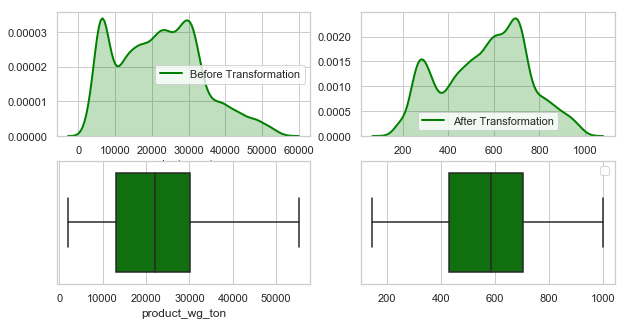

In [46]:
fig, ax = plt.subplots(2, 2)
sns.distplot(df_new['product_wg_ton'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Before Transformation", color ="green", ax = ax[0][0])
 
sns.distplot(fitted_value_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "After Transformation", color ="green", ax = ax[0][1])

sns.boxplot(df_new['product_wg_ton'], color ="green", ax = ax[1][0])
 
sns.boxplot(fitted_value_data, color ="green", ax = ax[1][1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda_value}")

In [47]:
# Finding Skewness

df_new.skew()

Location_type_Urban                3.054017
WH_capacity_size_Mid               0.404872
WH_capacity_size_Small             1.560454
zone_North                         0.361295
zone_South                         1.127422
zone_West                          0.785433
WH_regional_zone_Zone 2            2.360618
WH_regional_zone_Zone 3            2.410081
WH_regional_zone_Zone 4            1.785360
WH_regional_zone_Zone 5            1.635609
WH_regional_zone_Zone 6            0.706068
wh_owner_type_Rented               0.173135
approved_wh_govt_certificate_A+    1.779592
approved_wh_govt_certificate_B     1.560127
approved_wh_govt_certificate_B+    1.526275
approved_wh_govt_certificate_C     1.116087
num_refill_req_l3m                -0.075217
transport_issue_l1y                1.610907
Competitor_in_mkt                  0.978456
retail_shop_num                    0.908302
distributor_num                    0.015213
flood_impacted                     2.701327
flood_proof                     

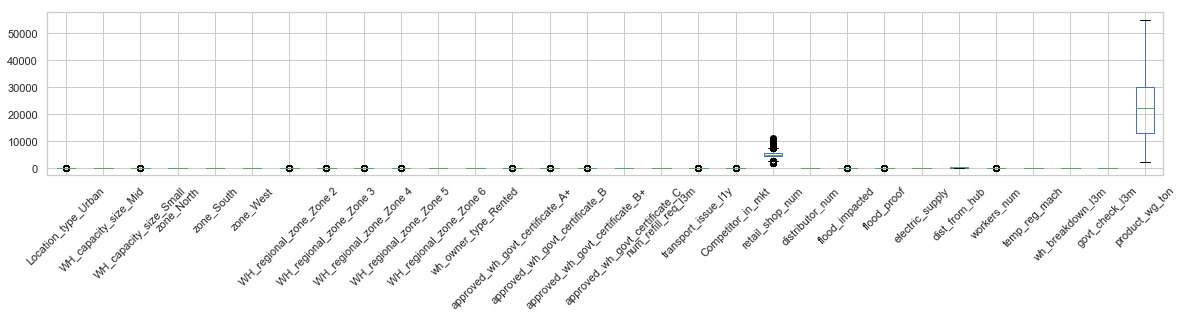

In [48]:
df_new.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

### 4) Business insights from EDA 

###### Is the data unbalanced? If so, what can be done? Please explain in the context of the business

In [112]:
#Scale the data
from scipy.stats import zscore
df_scaled = df_new.apply(zscore)

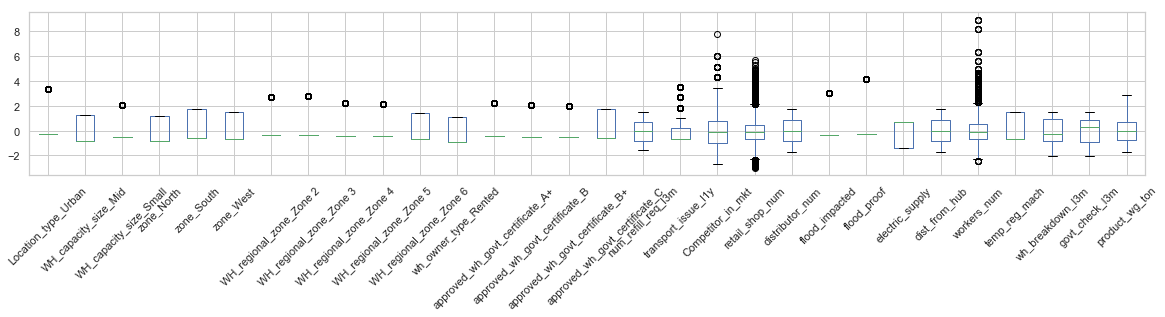

In [113]:
#Check for presence of outliers in each feature
df_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [115]:
wardlink = linkage(df_scaled, method = 'ward')

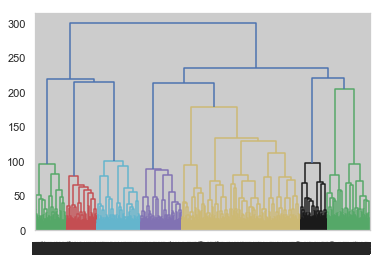

In [116]:
dend = dendrogram(wardlink)

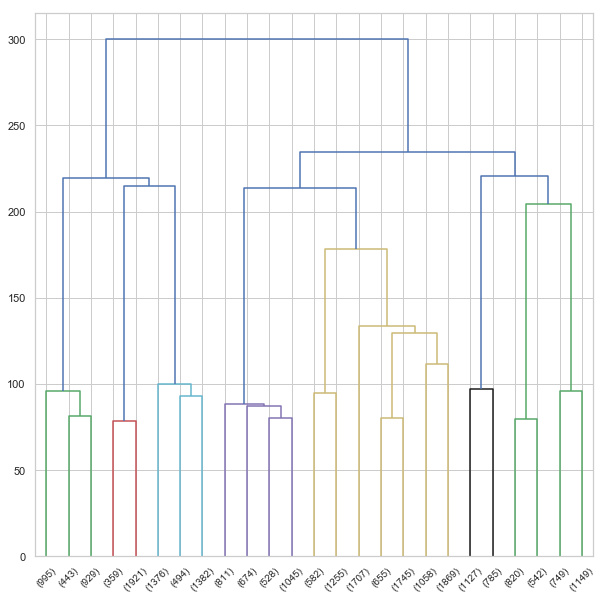

In [117]:
fig = plt.subplots(figsize=(10, 10))
dend=dendrogram(wardlink,truncate_mode='lastp',p=25)

from scipy.cluster.hierarchy import fcluster
clusters_maxclust = fcluster(wardlink, 30, criterion='maxclust')
clusters_maxclust

In [118]:
from scipy.cluster.hierarchy import fcluster
clusters_distance = fcluster(wardlink, 20, criterion='distance')
clusters_distance

array([115,  54,   4, ..., 103,  78, 121], dtype=int32)

In [119]:
# df_scaled['clusters_maxclust']=clusters_maxclust
df_scaled['clusters_distance']=clusters_distance

In [120]:
df_scaled.head()

,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,clusters_distance
Ware_house_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WH_100000,3.352150,-0.817858,2.048518,-0.835547,-0.584248,1.467034,-0.366682,-0.360902,-0.447815,-0.474036,1.413493,1.090302,-0.448780,-0.488221,-0.494807,-0.587143,-0.417807,0.188690,-0.967205,-0.317924,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.007207,-0.659770,0.898041,-0.441634,-0.429690,115
WH_100001,-0.298316,-0.817858,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,-0.587143,-1.568750,-0.645043,0.784661,1.169532,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.266445,-0.659770,-0.285180,-0.209944,-1.467034,54
WH_100002,-0.298316,1.222706,-0.488158,-0.835547,1.711602,-0.681648,2.727159,-0.360902,-0.447815,-0.474036,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,-0.587143,-1.185102,-0.645043,0.784661,-0.645620,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.044158,-0.659770,1.489652,0.369282,0.089112,4
WH_100003,-0.298316,1.222706,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,2.770838,-0.447815,-0.474036,-0.707467,1.090302,2.228265,-0.488221,-0.494807,-0.587143,1.116783,2.689890,-0.967205,0.963416,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.029744,1.515679,-0.285180,0.948508,0.001065,16
WH_100004,-0.298316,-0.817858,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,1.703163,-0.417807,0.188690,-0.967205,-0.233388,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.511269,-0.659770,1.489652,0.600972,0.169577,127


In [121]:
df_scaled['clusters_distance'].value_counts().sort_index()

1      244
2      188
3      164
4      175
5      224
6      196
7       69
8      178
9       91
10     272
11     169
12     131
13     266
14     122
15     101
16     136
17     125
18     130
19     141
20     203
21     267
22     279
23     110
24     144
25     185
26     134
27     203
28     145
29     146
30     274
      ... 
104    152
105    249
106    119
107    190
108     68
109    269
110    231
111    217
112    160
113    134
114    192
115     76
116    140
117    118
118    173
119    149
120     53
121    167
122    139
123     58
124    131
125    195
126    226
127    159
128    170
129    295
130     85
131    131
132    125
133    184
Name: clusters_distance, Length: 133, dtype: int64

df_scaled['clusters_distance'].value_counts()

In [122]:
from sklearn.cluster import KMeans
wss =[]
for i in range(1,25):
    KM = KMeans(n_clusters=i,random_state=42)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
wss

[34403286.18396003,
 9596333.211996906,
 4976508.631729851,
 2980214.0733356094,
 2154419.000749273,
 1663061.2984772602,
 1346638.6495125326,
 1169965.6533276478,
 1013783.179420623,
 924048.4333948131,
 836554.4942959705,
 780635.1272039604,
 745862.9784592931,
 715355.1124479965,
 689299.2833644685,
 663214.2493626281,
 641252.9918066463,
 623045.608346452,
 613502.7236255747,
 596911.903408303,
 584880.5433266577,
 575484.7076653367,
 569681.3480353443,
 549167.2703116344]

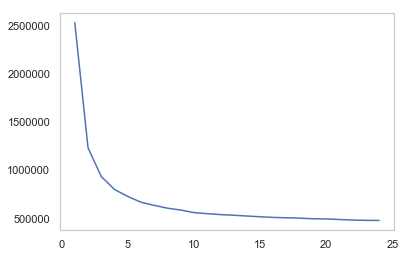

In [111]:
plt.plot(range(1,25), wss)
plt.grid()
plt.show()

In [123]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
labels = k_means.labels_
labels

array([3, 2, 0, ..., 3, 1, 3])

In [124]:
df_scaled["Clus_kmeans"] = labels
df_scaled.head(5)

,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,clusters_distance,Clus_kmeans
Ware_house_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WH_100000,3.352150,-0.817858,2.048518,-0.835547,-0.584248,1.467034,-0.366682,-0.360902,-0.447815,-0.474036,1.413493,1.090302,-0.448780,-0.488221,-0.494807,-0.587143,-0.417807,0.188690,-0.967205,-0.317924,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.007207,-0.659770,0.898041,-0.441634,-0.429690,115,3
WH_100001,-0.298316,-0.817858,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,-0.587143,-1.568750,-0.645043,0.784661,1.169532,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.266445,-0.659770,-0.285180,-0.209944,-1.467034,54,2
WH_100002,-0.298316,1.222706,-0.488158,-0.835547,1.711602,-0.681648,2.727159,-0.360902,-0.447815,-0.474036,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,-0.587143,-1.185102,-0.645043,0.784661,-0.645620,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.044158,-0.659770,1.489652,0.369282,0.089112,4,0
WH_100003,-0.298316,1.222706,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,2.770838,-0.447815,-0.474036,-0.707467,1.090302,2.228265,-0.488221,-0.494807,-0.587143,1.116783,2.689890,-0.967205,0.963416,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.029744,1.515679,-0.285180,0.948508,0.001065,16,0
WH_100004,-0.298316,-0.817858,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,1.703163,-0.417807,0.188690,-0.967205,-0.233388,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.511269,-0.659770,1.489652,0.600972,0.169577,127,3


In [125]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df_scaled,labels)

0.4943501870019795

In [126]:
sil_width = silhouette_samples(df_scaled,labels)
sil_width

array([0.62370062, 0.60745966, 0.65914559, ..., 0.26570723, 0.58573372,
       0.65628501])

In [127]:
df_scaled["sil_width"] = sil_width
df_scaled.head(5)


,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,clusters_distance,Clus_kmeans,sil_width
Ware_house_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WH_100000,3.352150,-0.817858,2.048518,-0.835547,-0.584248,1.467034,-0.366682,-0.360902,-0.447815,-0.474036,1.413493,1.090302,-0.448780,-0.488221,-0.494807,-0.587143,-0.417807,0.188690,-0.967205,-0.317924,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.007207,-0.659770,0.898041,-0.441634,-0.429690,115,3,0.623701
WH_100001,-0.298316,-0.817858,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,-0.587143,-1.568750,-0.645043,0.784661,1.169532,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.266445,-0.659770,-0.285180,-0.209944,-1.467034,54,2,0.607460
WH_100002,-0.298316,1.222706,-0.488158,-0.835547,1.711602,-0.681648,2.727159,-0.360902,-0.447815,-0.474036,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,-0.587143,-1.185102,-0.645043,0.784661,-0.645620,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.044158,-0.659770,1.489652,0.369282,0.089112,4,0,0.659146
WH_100003,-0.298316,1.222706,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,2.770838,-0.447815,-0.474036,-0.707467,1.090302,2.228265,-0.488221,-0.494807,-0.587143,1.116783,2.689890,-0.967205,0.963416,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.029744,1.515679,-0.285180,0.948508,0.001065,16,0,0.649708
WH_100004,-0.298316,-0.817858,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,1.703163,-0.417807,0.188690,-0.967205,-0.233388,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.511269,-0.659770,1.489652,0.600972,0.169577,127,3,0.664989


In [128]:
silhouette_samples(df_scaled,labels).min()

0.024633233173286053

In [130]:
df_scaled.drop(['clusters_distance','Clus_kmeans','sil_width'],axis=1,inplace=True)

In [131]:
df_scaled.head()

,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
Ware_house_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WH_100000,3.352150,-0.817858,2.048518,-0.835547,-0.584248,1.467034,-0.366682,-0.360902,-0.447815,-0.474036,1.413493,1.090302,-0.448780,-0.488221,-0.494807,-0.587143,-0.417807,0.188690,-0.967205,-0.317924,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.007207,-0.659770,0.898041,-0.441634,-0.429690
WH_100001,-0.298316,-0.817858,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,-0.587143,-1.568750,-0.645043,0.784661,1.169532,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.266445,-0.659770,-0.285180,-0.209944,-1.467034
WH_100002,-0.298316,1.222706,-0.488158,-0.835547,1.711602,-0.681648,2.727159,-0.360902,-0.447815,-0.474036,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,-0.587143,-1.185102,-0.645043,0.784661,-0.645620,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.044158,-0.659770,1.489652,0.369282,0.089112
WH_100003,-0.298316,1.222706,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,2.770838,-0.447815,-0.474036,-0.707467,1.090302,2.228265,-0.488221,-0.494807,-0.587143,1.116783,2.689890,-0.967205,0.963416,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.029744,1.515679,-0.285180,0.948508,0.001065
WH_100004,-0.298316,-0.817858,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,-0.448780,-0.488221,-0.494807,1.703163,-0.417807,0.188690,-0.967205,-0.233388,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.511269,-0.659770,1.489652,0.600972,0.169577
